# Feature Scaling

## Objectives

- Demonstrate the importance of feature scaling in machine learning.
- Compare different scaling techniques and their effects on data distribution.
- Evaluate the suitability of each scaling method for various types of data.

## Background

Feature scaling is crucial in data preprocessing for machine learning as it normalizes the range of independent variables or features of data. This standardization helps algorithms to interpret features on an equivalent basis.

## Datasets Used

Automobile Dataset from UCI Machine Learning Repository: Contains categorical and continuous variables related to automobile features.

## Introduction

Feature scaling consists of normalizing features in a dataset. Real-world datasets often contain features varying in magnitude, range, and units. Therefore, we need to perform feature scaling for machine learning techniques to interpret these features on the same scale.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc = {'figure.figsize':(10,5)})
sns.set_style("whitegrid")

## Automobile dataset

We will use the Automobile Data Set [https://archive.ics.uci.edu/ml/datasets/automobile] from the UCI Machine Learning Repository [https://archive-beta.ics.uci.edu/]. It includes categorical and continuous variables. 

In [2]:
# Defining the headers
headers = [
    "symboling",
    "normalized_losses",
    "make",
    "fuel_type",
    "aspiration",
    "num_doors",
    "body_style",
    "drive_wheels",
    "engine_location",
    "wheel_base",
    "length",
    "width",
    "height",
    "curb_weight",
    "engine_type",
    "num_cylinders",
    "engine_size",
    "fuel_system",
    "bore",
    "stroke",
    "compression_ratio",
    "horsepower",
    "peak_rpm",
    "city_mpg",
    "highway_mpg",
    "price"
]

In [3]:
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None, 
    names=headers, 
    na_values="?" 
)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,...,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,...,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,...,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,...,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,...,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,...,115.0,5500.0,18,22,17450.0


In [4]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

We will work only with variables: `length`, `width`, and `height`.

In [5]:
dfn = df[['length','width','height']].copy()
dfn.head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [6]:
dfn_melted = pd.melt(dfn, value_vars=['length','width','height'], var_name ='measure')
dfn_melted.head()

,measure,value
0,length,168.8
1,length,168.8
2,length,171.2
3,length,176.6
4,length,176.6


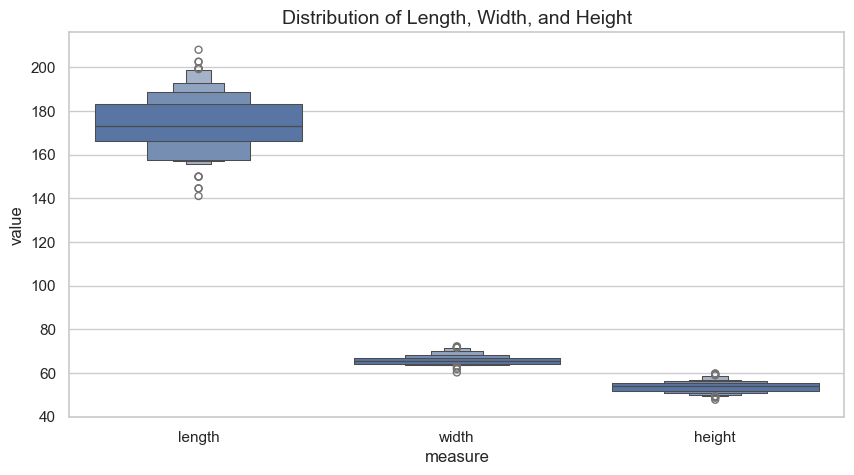

In [7]:
sns.boxenplot(
    x='measure', 
    y='value', 
    data=dfn_melted
).set_title('Distribution of Length, Width, and Height', fontsize=14);

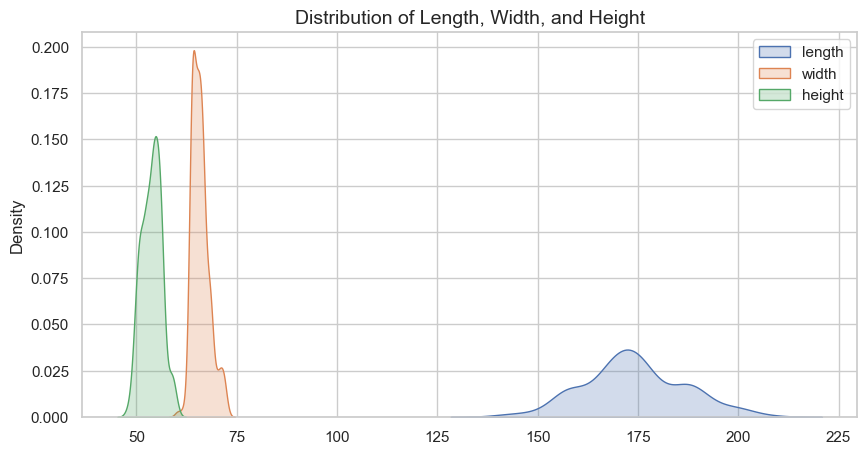

In [8]:
ax = sns.kdeplot(x='length', data=dfn, fill=True, label='length')
ax = sns.kdeplot(x='width',  data=dfn, fill=True, label='width')
ax = sns.kdeplot(x='height', data=dfn, fill=True, label='height')
plt.title('Distribution of Length, Width, and Height', fontsize=14)
ax.set(xlabel=None)
plt.legend();

As you can see, the three variables' values are very different among them.

## Min-Max Scaling

Min-Max Scaling transforms the data to a fixed range, usually 0 to 1.

In [9]:
from sklearn.preprocessing import MinMaxScaler 

mms = MinMaxScaler()

In [10]:
dfn_mms = pd.DataFrame(mms.fit_transform(dfn), columns=dfn.columns)
dfn_mms.head()

,length,width,height
0,0.413433,0.316667,0.083333
1,0.413433,0.316667,0.083333
2,0.449254,0.433333,0.383333
3,0.529851,0.491667,0.541667
4,0.529851,0.508333,0.541667


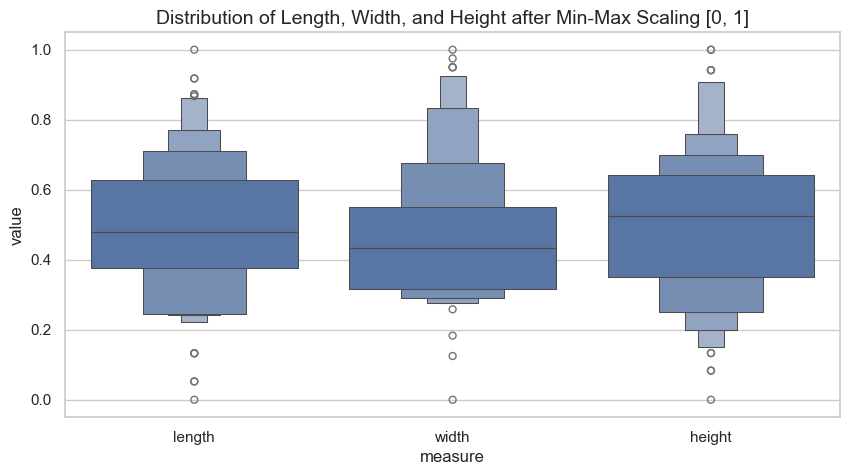

In [11]:
dfn_mms_melted = pd.melt(dfn_mms, value_vars=['length','width','height'], var_name ='measure')
sns.boxenplot(
    x='measure', 
    y='value', 
    data=dfn_mms_melted
).set_title('Distribution of Length, Width, and Height after Min-Max Scaling [0, 1]', fontsize=14);

For all variables, the minimum is 0 and the maximum is 1

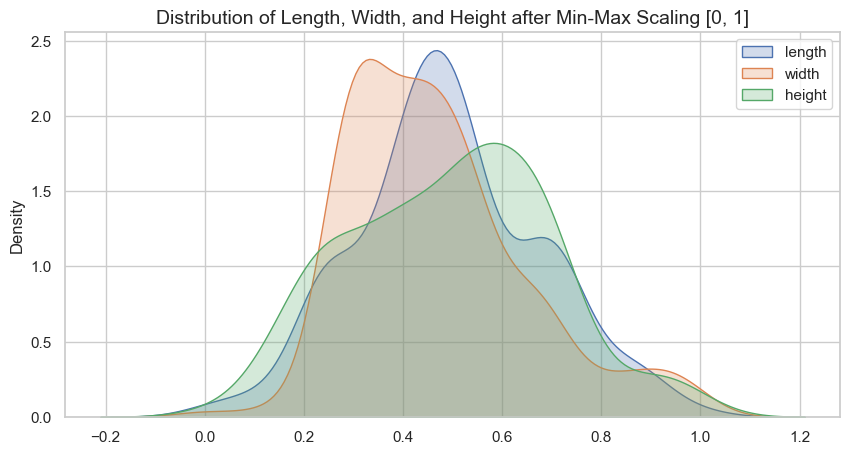

In [12]:
ax = sns.kdeplot(x='length', data=dfn_mms, fill=True, label='length')
ax = sns.kdeplot(x='width',  data=dfn_mms, fill=True, label='width')
ax = sns.kdeplot(x='height', data=dfn_mms, fill=True, label='height')
plt.title('Distribution of Length, Width, and Height after Min-Max Scaling [0, 1]', fontsize=14)
ax.set(xlabel=None)
plt.legend();

### Min-Max Scaling [-1,1]

Min-Max Scaling scales the variables'values to a fixed range. Here we will use [-1,1].

In [13]:
mms2 = MinMaxScaler(feature_range=(-1,1))

In [14]:
dfn_mms2 = pd.DataFrame(mms2.fit_transform(dfn), columns=dfn.columns)
dfn_mms2.head()

,length,width,height
0,-0.173134,-0.366667,-0.833333
1,-0.173134,-0.366667,-0.833333
2,-0.101493,-0.133333,-0.233333
3,0.059701,-0.016667,0.083333
4,0.059701,0.016667,0.083333


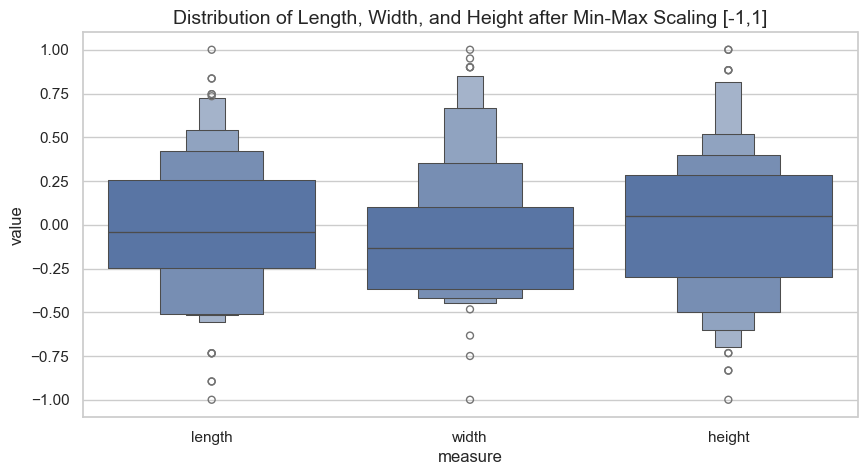

In [15]:
dfn_mms2_melted = pd.melt(dfn_mms2, value_vars=['length','width','height'], var_name ='measure')
sns.boxenplot(
    x='measure', 
    y='value', 
    data=dfn_mms2_melted
).set_title('Distribution of Length, Width, and Height after Min-Max Scaling [-1,1]', fontsize=14);

Notice that for all variables, the minimum is -1 and the maximum is 1

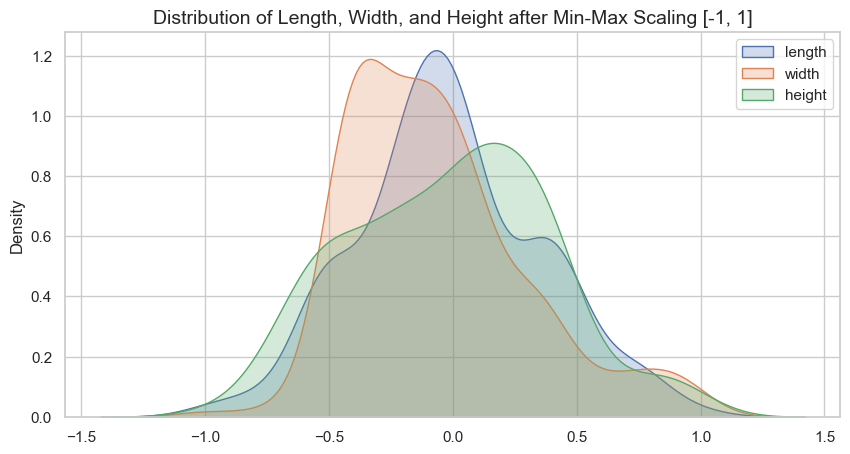

In [16]:
ax = sns.kdeplot(x='length', data=dfn_mms2, fill=True, label='length')
ax = sns.kdeplot(x='width',  data=dfn_mms2, fill=True, label='width')
ax = sns.kdeplot(x='height', data=dfn_mms2, fill=True, label='height')
plt.title('Distribution of Length, Width, and Height after Min-Max Scaling [-1, 1]', fontsize=14)
ax.set(xlabel=None)
plt.legend();

## Max Abs Scaling

This estimator scales and translates each variable such that the maximal absolute value will be 1.0; that is, it divides every observation by the maximum value of the variable. It does not shift the data.

In [17]:
from sklearn.preprocessing import MaxAbsScaler 

mas = MaxAbsScaler()

In [18]:
dfn_mas = pd.DataFrame(mas.fit_transform(dfn), columns=dfn.columns)
dfn_mas.head()

,length,width,height
0,0.811148,0.886584,0.816054
1,0.811148,0.886584,0.816054
2,0.822681,0.905947,0.876254
3,0.848630,0.915629,0.908027
4,0.848630,0.918396,0.908027


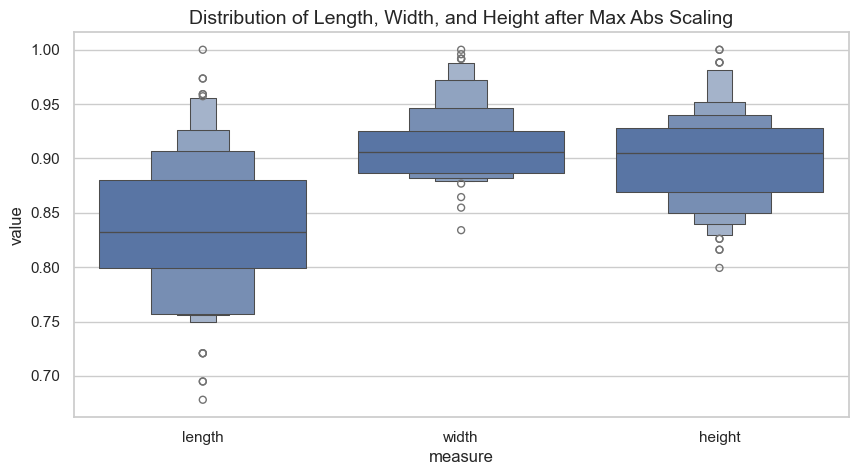

In [19]:
dfn_mas_melted = pd.melt(dfn_mas, value_vars=['length','width','height'], var_name ='measure')
sns.boxenplot(
    x='measure', 
    y='value', 
    data=dfn_mas_melted
).set_title('Distribution of Length, Width, and Height after Max Abs Scaling', fontsize=14);

The Max Abs scaling is not useful when features has outliers. 

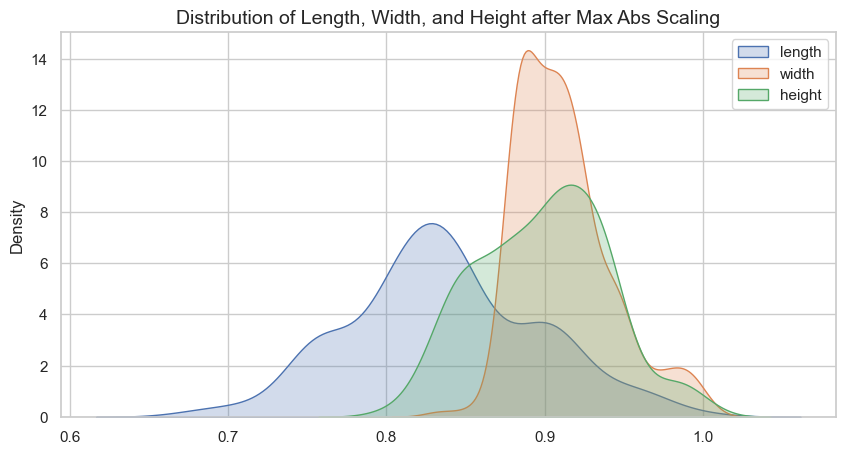

In [20]:
ax = sns.kdeplot(x='length', data=dfn_mas, fill=True, label='length')
ax = sns.kdeplot(x='width',  data=dfn_mas, fill=True, label='width')
ax = sns.kdeplot(x='height', data=dfn_mas, fill=True, label='height')
plt.title('Distribution of Length, Width, and Height after Max Abs Scaling', fontsize=14)
ax.set(xlabel=None)
plt.legend();

## Standardization or Z-Score

StandardScaler standardizes a variable by subtracting its mean and dividing each value by its standard deviation. Like the others, this process allows us to compare scores between different variables. It produces standard scores representing the number of standard deviations above or below the mean that a specific observation falls.

In [21]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [22]:
dfn_ss = pd.DataFrame(ss.fit_transform(dfn), columns=dfn.columns)
dfn_ss.head()

,length,width,height
0,-0.426521,-0.844782,-2.020417
1,-0.426521,-0.844782,-2.020417
2,-0.231513,-0.190566,-0.543527
3,0.207256,0.136542,0.235942
4,0.207256,0.230001,0.235942


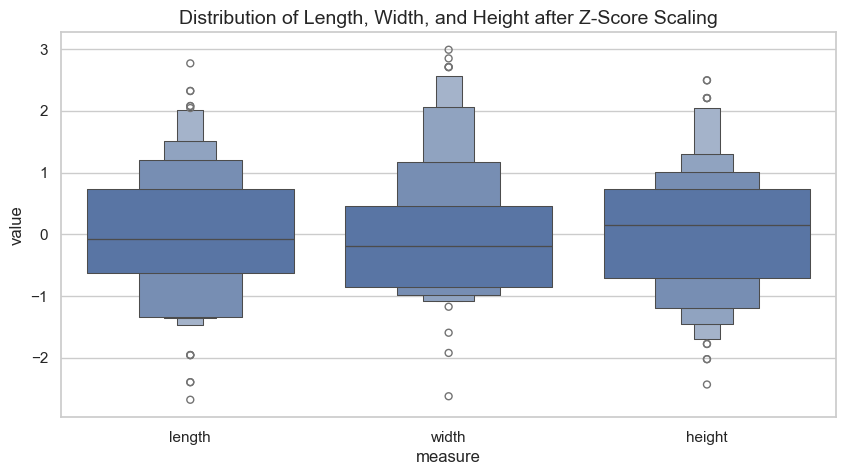

In [23]:
dfn_ss_melted = pd.melt(dfn_ss, value_vars=['length','width','height'], var_name ='measure')
sns.boxenplot(
    x='measure', 
    y='value', 
    data=dfn_ss_melted
).set_title('Distribution of Length, Width, and Height after Z-Score Scaling', fontsize=14);

As you can see, the mean is almost 0 and the standard deviation 1.

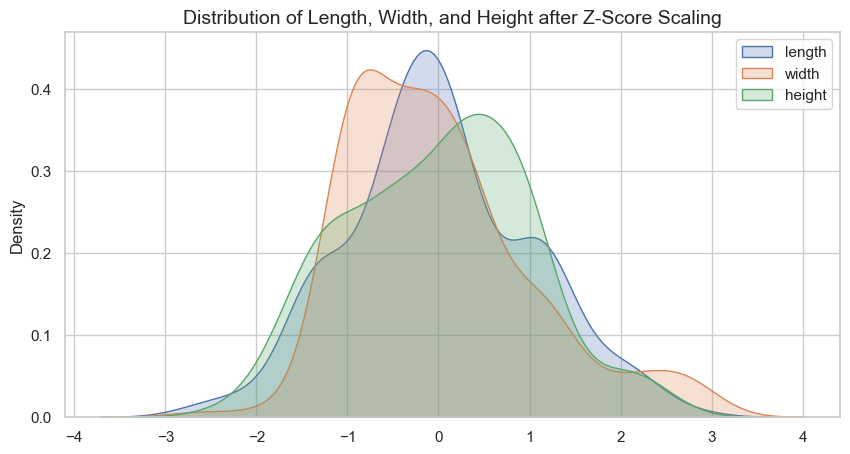

In [24]:
ax = sns.kdeplot(x='length', data=dfn_ss, fill=True, label='length')
ax = sns.kdeplot(x='width',  data=dfn_ss, fill=True, label='width')
ax = sns.kdeplot(x='height', data=dfn_ss, fill=True, label='height')
plt.title('Distribution of Length, Width, and Height after Z-Score Scaling', fontsize=14)
ax.set(xlabel=None)
plt.legend();

## Robust Scaling

Robust Scaler scales a variable using the quartiles and the interquartile range(IQR), that is, the difference between the third quartile (quantile 75)  and the first (quantile 25). It can handle outliers.

In [25]:
from sklearn.preprocessing import RobustScaler 

rs = RobustScaler()

In [26]:
dfn_rs = pd.DataFrame(ss.fit_transform(dfn), columns=dfn.columns)
dfn_rs.head()

,length,width,height
0,-0.426521,-0.844782,-2.020417
1,-0.426521,-0.844782,-2.020417
2,-0.231513,-0.190566,-0.543527
3,0.207256,0.136542,0.235942
4,0.207256,0.230001,0.235942


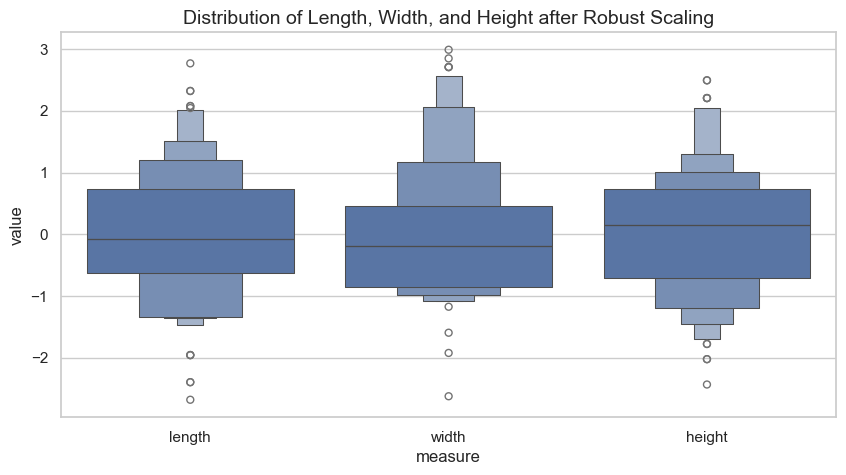

In [27]:
dfn_rs_melted = pd.melt(dfn_rs, value_vars=['length','width','height'], var_name ='measure')
sns.boxenplot(
    x='measure', 
    y='value', 
    data=dfn_rs_melted
).set_title('Distribution of Length, Width, and Height after Robust Scaling', fontsize=14);

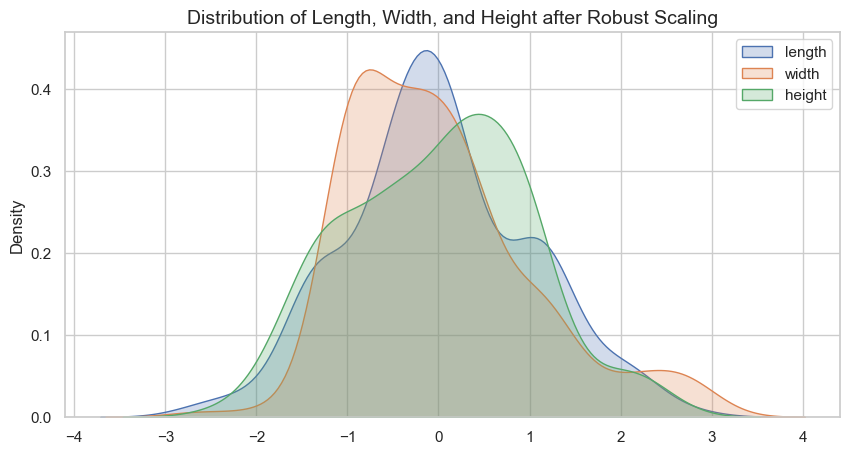

In [28]:
ax = sns.kdeplot(x='length', data=dfn_rs, fill=True, label='length')
ax = sns.kdeplot(x='width',  data=dfn_rs, fill=True, label='width')
ax = sns.kdeplot(x='height', data=dfn_rs, fill=True, label='height')
plt.title('Distribution of Length, Width, and Height after Robust Scaling', fontsize=14)
ax.set(xlabel=None)
plt.legend();

## Comparisons among different scaling

### Variable `length`

In [29]:
df_l = pd.concat(
    {
        'Min-Max': dfn_mms.length,
        'Max Abs': dfn_mas.length,
        'Z-Score': dfn_ss.length,
        'Robust': dfn_rs.length

    },
    axis=1
)

df_l.head()

,Min-Max,Max Abs,Z-Score,Robust
0,0.413433,0.811148,-0.426521,-0.426521
1,0.413433,0.811148,-0.426521,-0.426521
2,0.449254,0.822681,-0.231513,-0.231513
3,0.529851,0.848630,0.207256,0.207256
4,0.529851,0.848630,0.207256,0.207256


In [30]:
df_l.describe().round(2)

,Min-Max,Max Abs,Z-Score,Robust
count,205.00,205.00,205.00,205.00
mean,0.49,0.84,0.00,0.00
std,0.18,0.06,1.00,1.00
min,0.00,0.68,-2.68,-2.68
25%,0.38,0.80,-0.63,-0.63
50%,0.48,0.83,-0.07,-0.07
75%,0.63,0.88,0.74,0.74
max,1.00,1.00,2.77,2.77


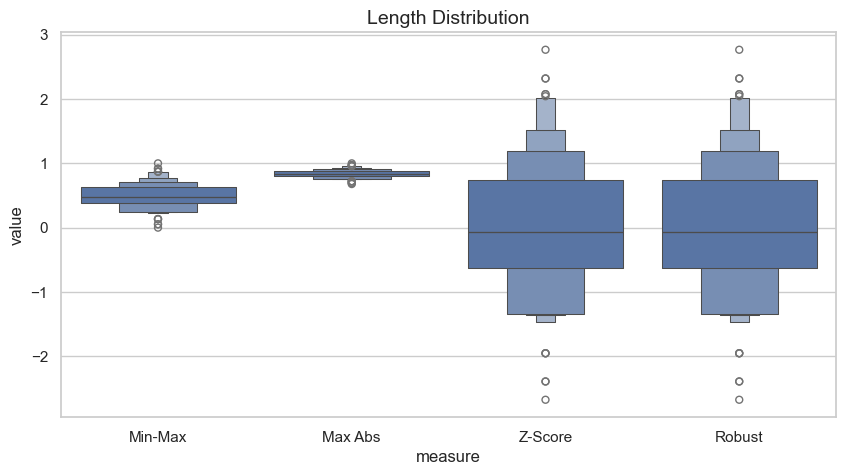

In [31]:
df_l_melted = pd.melt(df_l, value_vars=['Min-Max','Max Abs','Z-Score','Robust'], var_name ='measure')
sns.boxenplot(
    x='measure', 
    y='value', 
    data=df_l_melted
).set_title('Length Distribution', fontsize=14);

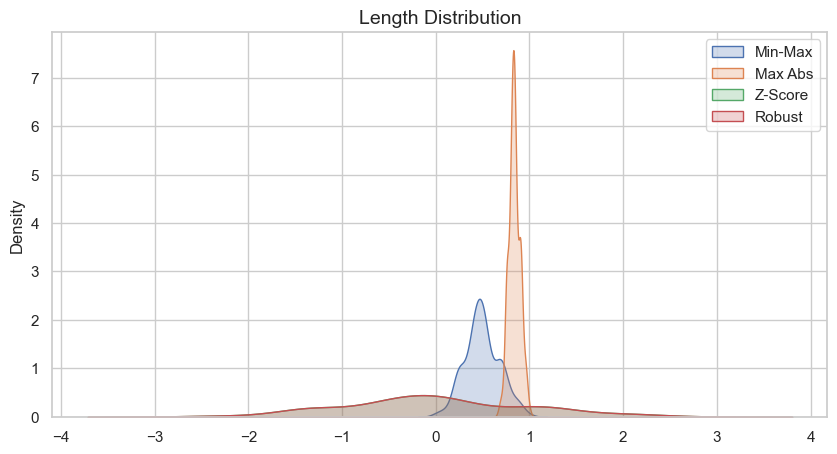

In [32]:
ax = sns.kdeplot(x='Min-Max', data=df_l, fill=True, label='Min-Max')
ax = sns.kdeplot(x='Max Abs', data=df_l, fill=True, label='Max Abs')
ax = sns.kdeplot(x='Z-Score', data=df_l, fill=True, label='Z-Score')
ax = sns.kdeplot(x='Robust',  data=df_l, fill=True, label='Robust')
plt.title('Length Distribution', fontsize=14)
ax.set(xlabel=None)
plt.legend();

### Variable `width`

In [33]:
df_w = pd.concat(
    {
        'Min-Max': dfn_mms.width,
        'Max Abs': dfn_mas.width,
        'Z-Score': dfn_ss.width,
        'Robust': dfn_rs.width
    },
    axis=1
)

df_w.head()

,Min-Max,Max Abs,Z-Score,Robust
0,0.316667,0.886584,-0.844782,-0.844782
1,0.316667,0.886584,-0.844782,-0.844782
2,0.433333,0.905947,-0.190566,-0.190566
3,0.491667,0.915629,0.136542,0.136542
4,0.508333,0.918396,0.230001,0.230001


In [34]:
df_w.describe().round(2)

,Min-Max,Max Abs,Z-Score,Robust
count,205.00,205.00,205.00,205.00
mean,0.47,0.91,0.00,0.00
std,0.18,0.03,1.00,1.00
min,0.00,0.83,-2.62,-2.62
25%,0.32,0.89,-0.84,-0.84
50%,0.43,0.91,-0.19,-0.19
75%,0.55,0.93,0.46,0.46
max,1.00,1.00,2.99,2.99


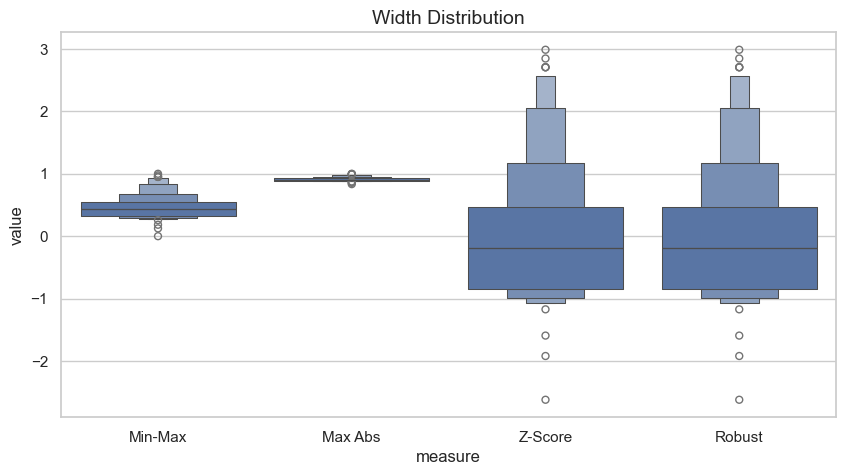

In [35]:
df_w_melted = pd.melt(df_w, value_vars=['Min-Max','Max Abs','Z-Score','Robust'], var_name ='measure')
sns.boxenplot(
    x='measure', 
    y='value', 
    data=df_w_melted
).set_title('Width Distribution', fontsize=14);

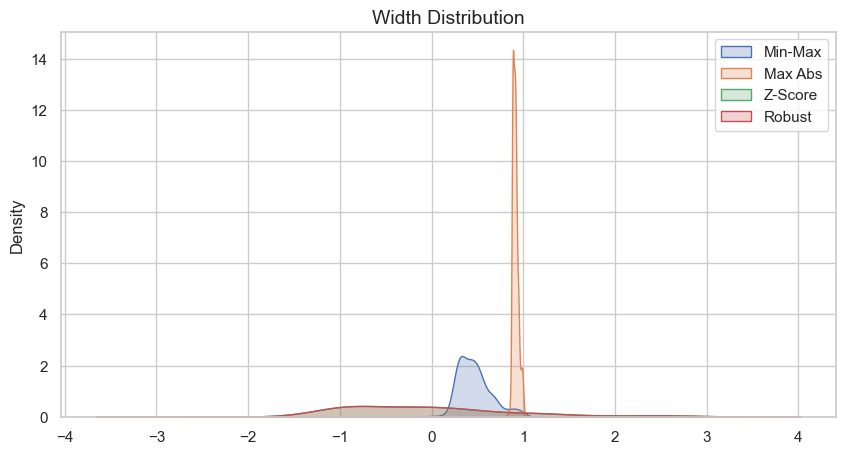

In [36]:
ax = sns.kdeplot(x='Min-Max', data=df_w, fill=True, label='Min-Max')
ax = sns.kdeplot(x='Max Abs', data=df_w, fill=True, label='Max Abs')
ax = sns.kdeplot(x='Z-Score', data=df_w, fill=True, label='Z-Score')
ax = sns.kdeplot(x='Robust',  data=df_w, fill=True, label='Robust')
plt.title('Width Distribution', fontsize=14)
ax.set(xlabel=None)
plt.legend();

### Variable `height`

In [37]:
df_h = pd.concat(
    {
        'Min-Max': dfn_mms.height,
        'Max Abs': dfn_mas.height,
        'Z-Score': dfn_ss.height,
        'Robust': dfn_rs.height
    },
    axis=1
)
df_h.head()

,Min-Max,Max Abs,Z-Score,Robust
0,0.083333,0.816054,-2.020417,-2.020417
1,0.083333,0.816054,-2.020417,-2.020417
2,0.383333,0.876254,-0.543527,-0.543527
3,0.541667,0.908027,0.235942,0.235942
4,0.541667,0.908027,0.235942,0.235942


In [38]:
df_h.describe().round(2)

,Min-Max,Max Abs,Z-Score,Robust
count,205.00,205.00,205.00,205.00
mean,0.49,0.90,-0.00,-0.00
std,0.20,0.04,1.00,1.00
min,0.00,0.80,-2.43,-2.43
25%,0.35,0.87,-0.71,-0.71
50%,0.52,0.90,0.15,0.15
75%,0.64,0.93,0.73,0.73
max,1.00,1.00,2.49,2.49


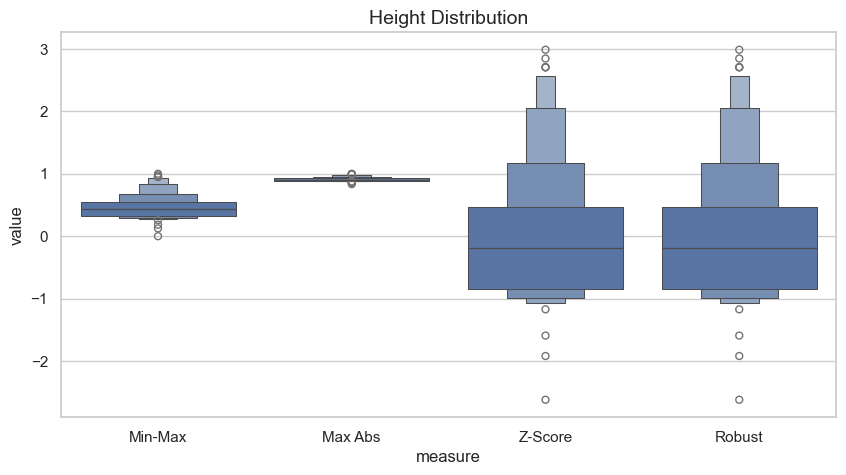

In [39]:
df_h_melted = pd.melt(df_h, value_vars=['Min-Max','Max Abs','Z-Score','Robust'], var_name ='measure')
sns.boxenplot(
    x='measure', 
    y='value', 
    data=df_w_melted
).set_title('Height Distribution', fontsize=14);

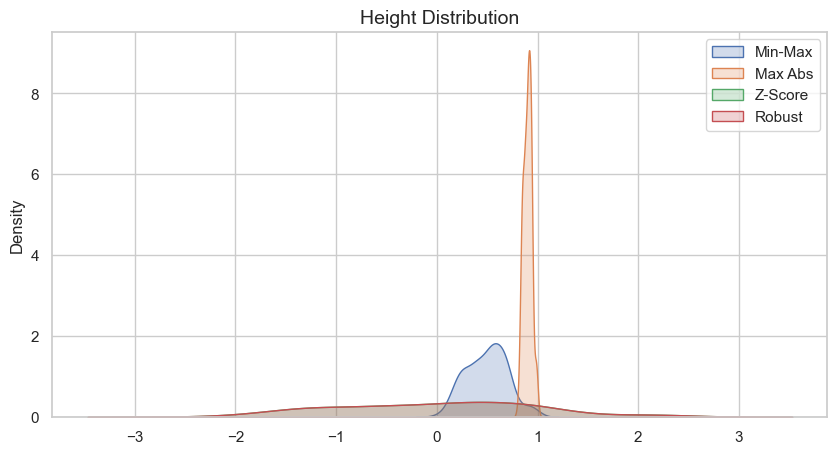

In [40]:
ax = sns.kdeplot(x='Min-Max', data=df_h, fill=True, label='Min-Max')
ax = sns.kdeplot(x='Max Abs', data=df_h, fill=True, label='Max Abs')
ax = sns.kdeplot(x='Z-Score', data=df_h, fill=True, label='Z-Score')
ax = sns.kdeplot(x='Robust',  data=df_h, fill=True, label='Robust')
plt.title('Height Distribution', fontsize=14)
ax.set(xlabel=None)
plt.legend();

## Conclusions

Key Takeaways:
- Feature scaling standardizes the range of data features, allowing for better performance in machine learning models.
Min-Max Scaling adjusts the data into a fixed range (0 to 1 or -1 to 1), which is beneficial when all features must have the same scale.
- Max Abs Scaling normalizes data by dividing it by the maximum absolute value of each feature, making it less sensitive to outliers.
- Standardization (Z-Score) normalizes data features by their mean and standard deviation, resulting in a distribution centered around zero with a standard deviation of one.
- Robust Scaling uses the interquartile range, making it effective in handling outliers.
- Different scaling techniques can significantly affect the performance and behavior of machine learning models, making the choice of technique dependent on the specific data characteristics and the model used.

## References

- https://scikit-learn.org/stable/modules/preprocessing.html